### Maze example

Author: Yung-Kyun Noh


In [1]:
import numpy as np

<img src="ReinforcementLearningMAZE_S1.png",width=500>

State: $S = \{0, \ldots,10\}$

The agent can be located in one of the states.

In [2]:
StateSize = 11
setS = range(StateSize)
print setS

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


#### Display one of the state figures randomly

The following code shows the state figures randomly. Try the following code repeatedly.

9.0
ReinforcementLearningMAZE_S9.png


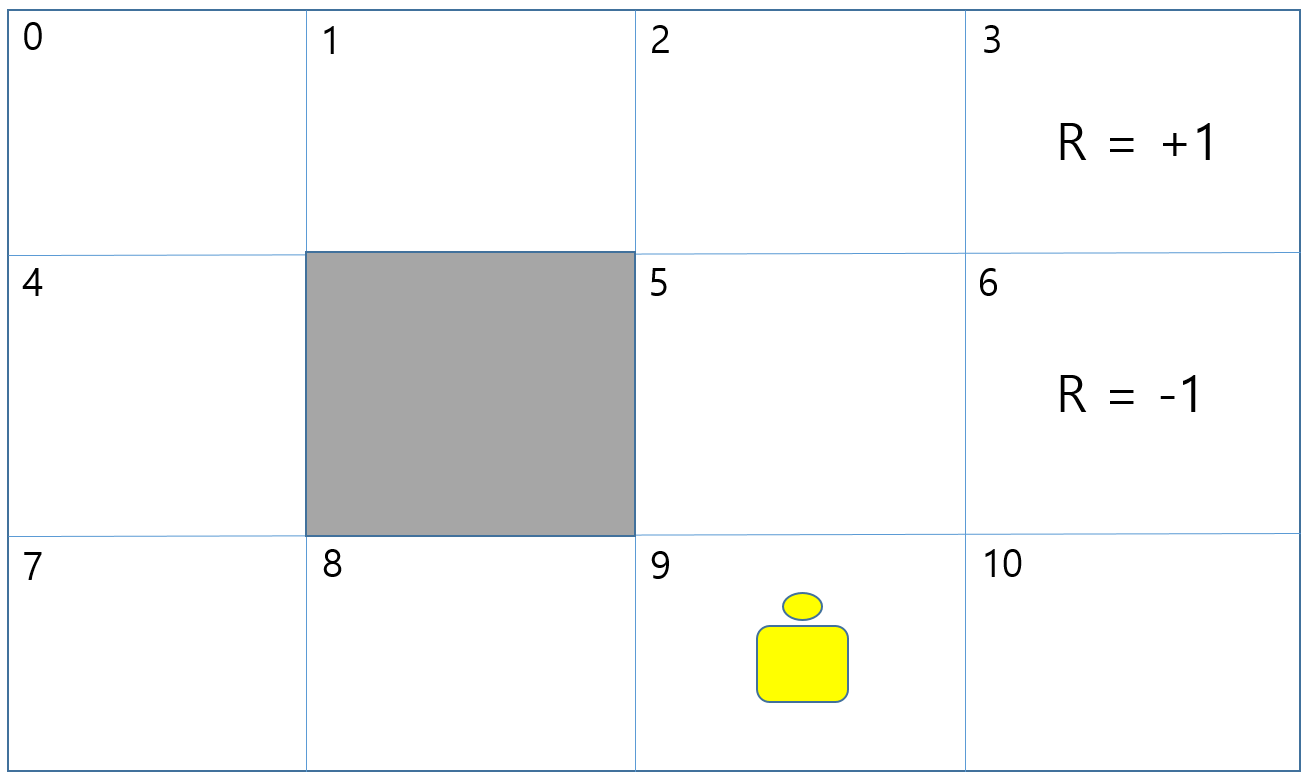

In [3]:
from IPython.display import Image

# def displayCurState(curState):
#     StateFigureName = "ReinforcementLearningMAZE_S%d.png" % curState
#     print StateFigureName
#     # Image(filename='ReinforcementLearningMAZE_S1.png', width=500) 
#     Image(filename=StateFigureName, width=500) 

# Randomly display one of the state figure
curState = np.floor(np.random.rand()*len(setS))
print curState

# displayCurState(curState)

StateFigureName = "ReinforcementLearningMAZE_S%d.png" % curState
print StateFigureName
# Image(filename='ReinforcementLearningMAZE_S1.png', width=500) 
Image(filename=StateFigureName, width=500) 


## Environment Parameters

Now first is first. Insert the transition probabilities for each action. The actions consist of 

left (action code = 0)

right (=1)

up (=2)

down (=3).


The variable SignalRatio ($=p$) is defined. If the agent is located at 0 (current state is 0), with the action right (=1), the agent aims to move to the state 1, but it moves to the state 4 with probability $\frac{1 - p}{3}$. With probability $p$ and additional $\frac{2}{3}(1 - p)$, the agent moves to the state 1.

Try $p = 0.9$, $p = 0.4$, $p = 0.2$, $p = 0.99$, and so on.

In [4]:
actionNum = 4    # left, right, up, down
SignalRatio = 0.9

# Transition progabilities of action 1 (Left)
action1 = np.zeros([StateSize, StateSize])   # left
action1[0,0] = SignalRatio + (1 - SignalRatio)/3
action1[0,1] = (1 - SignalRatio)/3
action1[0,4] = (1 - SignalRatio)/3
action1[1,0] = SignalRatio + (1 - SignalRatio)/3*2
action1[1,2] = (1 - SignalRatio)/3
action1[2,1] = SignalRatio + (1 - SignalRatio)/3
action1[2,3] = (1 - SignalRatio)/3
action1[2,5] = (1 - SignalRatio)/3
action1[3,:] = 1./(StateSize - 1)
action1[3,3] = 0
action1[4,4] = SignalRatio + (1 - SignalRatio)/3
action1[4,0] = (1 - SignalRatio)/3
action1[4,7] = (1 - SignalRatio)/3
action1[5,5] = SignalRatio
action1[5,2] = (1 - SignalRatio)/3
action1[5,6] = (1 - SignalRatio)/3
action1[5,9] = (1 - SignalRatio)/3
action1[6,:] = 1./(StateSize - 1)
action1[6,6] = 0
action1[7,7] = SignalRatio + (1 - SignalRatio)/3
action1[7,4] = (1 - SignalRatio)/3
action1[7,8] = (1 - SignalRatio)/3
action1[8,7] = SignalRatio + (1 - SignalRatio)/3*2
action1[8,9] = (1 - SignalRatio)/3
action1[9,8] = SignalRatio + (1 - SignalRatio)/3
action1[9,5] = (1 - SignalRatio)/3
action1[9,10] = (1 - SignalRatio)/3
action1[10,9] = SignalRatio + (1 - SignalRatio)/3
action1[10,6] = (1 - SignalRatio)/3
action1[10,10] = (1 - SignalRatio)/3

# Transition progabilities of action 2 (Right)
action2 = np.zeros([StateSize, StateSize])   # right
action2[0,1] = SignalRatio + (1 - SignalRatio)/3*2
action2[0,4] = (1 - SignalRatio)/3
action2[1,2] = SignalRatio + (1 - SignalRatio)/3*2
action2[1,0] = (1 - SignalRatio)/3
action2[2,3] = SignalRatio + (1 - SignalRatio)/3
action2[2,1] = (1 - SignalRatio)/3
action2[2,5] = (1 - SignalRatio)/3
action2[3,:] = 1./(StateSize - 1)
action2[3,3] = 0
action2[4,4] = SignalRatio + (1 - SignalRatio)/3
action2[4,0] = (1 - SignalRatio)/3
action2[4,7] = (1 - SignalRatio)/3
action2[5,6] = SignalRatio + (1 - SignalRatio)/3
action2[5,2] = (1 - SignalRatio)/3
action2[5,9] = (1 - SignalRatio)/3
action2[6,:] = 1./(StateSize - 1)
action2[6,6] = 0
action2[7,8] = SignalRatio + (1 - SignalRatio)/3*2
action2[7,4] = (1 - SignalRatio)/3
action2[8,9] = SignalRatio + (1 - SignalRatio)/3*2
action2[8,7] = (1 - SignalRatio)/3
action2[9,10] = SignalRatio + (1 - SignalRatio)/3
action2[9,5] = (1 - SignalRatio)/3
action2[9,8] = (1 - SignalRatio)/3
action2[10,10] = SignalRatio + (1 - SignalRatio)/3
action2[10,6] = (1 - SignalRatio)/3
action2[10,9] = (1 - SignalRatio)/3

# Transition progabilities of action 3 (Up)
action3 = np.zeros([StateSize, StateSize])   # up
action3[0,0] = SignalRatio + (1 - SignalRatio)/3
action3[0,1] = (1 - SignalRatio)/3
action3[0,4] = (1 - SignalRatio)/3
action3[1,1] = SignalRatio + (1 - SignalRatio)/3
action3[1,0] = (1 - SignalRatio)/3
action3[1,2] = (1 - SignalRatio)/3
action3[2,2] = SignalRatio
action3[2,1] = (1 - SignalRatio)/3
action3[2,3] = (1 - SignalRatio)/3
action3[2,5] = (1 - SignalRatio)/3
action3[3,:] = 1./(StateSize - 1)
action3[3,3] = 0
action3[4,0] = SignalRatio + (1 - SignalRatio)/3*2
action3[4,7] = (1 - SignalRatio)/3
action3[5,2] = SignalRatio + (1 - SignalRatio)/3
action3[5,6] = (1 - SignalRatio)/3
action3[5,9] = (1 - SignalRatio)/3
action3[6,:] = 1./(StateSize - 1)
action3[6,6] = 0
action3[7,4] = SignalRatio + (1 - SignalRatio)/3*2
action3[7,8] = (1 - SignalRatio)/3
action3[8,8] = SignalRatio + (1 - SignalRatio)/3
action3[8,7] = (1 - SignalRatio)/3
action3[8,9] = (1 - SignalRatio)/3
action3[9,5] = SignalRatio + (1 - SignalRatio)/3
action3[9,8] = (1 - SignalRatio)/3
action3[9,10] = (1 - SignalRatio)/3
action3[10,6] = SignalRatio + (1 - SignalRatio)/3*2
action3[10,9] = (1 - SignalRatio)/3

# Transition progabilities of action 4 (Down)
action4 = np.zeros([StateSize, StateSize])   # down
action4[0,4] = SignalRatio + (1 - SignalRatio)/3*2
action4[0,1] = (1 - SignalRatio)/3
action4[1,1] = SignalRatio + (1 - SignalRatio)/3
action4[1,0] = (1 - SignalRatio)/3
action4[1,2] = (1 - SignalRatio)/3
action4[2,5] = SignalRatio + (1 - SignalRatio)/3
action4[2,1] = (1 - SignalRatio)/3
action4[2,3] = (1 - SignalRatio)/3
action4[3,:] = 1./(StateSize - 1)
action4[3,3] = 0
action4[4,7] = SignalRatio + (1 - SignalRatio)/3*2
action4[4,0] = (1 - SignalRatio)/3
action4[5,9] = SignalRatio + (1 - SignalRatio)/3
action4[5,2] = (1 - SignalRatio)/3
action4[5,6] = (1 - SignalRatio)/3
action4[6,:] = 1./(StateSize - 1)
action4[6,6] = 0
action4[7,7] = SignalRatio + (1 - SignalRatio)/3
action4[7,4] = (1 - SignalRatio)/3
action4[7,8] = (1 - SignalRatio)/3
action4[8,8] = SignalRatio + (1 - SignalRatio)/3
action4[8,7] = (1 - SignalRatio)/3
action4[8,9] = (1 - SignalRatio)/3
action4[9,9] = SignalRatio + (1 - SignalRatio)/3
action4[9,8] = (1 - SignalRatio)/3
action4[9,10] = (1 - SignalRatio)/3
action4[10,10] = SignalRatio + (1 - SignalRatio)/3
action4[10,6] = (1 - SignalRatio)/3
action4[10,9] = (1 - SignalRatio)/3


Now we can test the transitions by the actions using the transition probabilities. 

#### Determine the initial state randomly

In [5]:
# Initialize
currentState = np.floor(np.random.random()*StateSize)
currentState = int(currentState)
print currentState

8


#### Reward initialize and set the discount factor $\gamma$

In [6]:
curTotalReward = 0
gammaVal = .9

#### Test State change and try to obtain more rewards through actions

8
[[ 0.          0.          0.          0.          0.          0.          0.
   0.03333333  0.          0.96666667  0.        ]]
right
current Reward: 0.000000


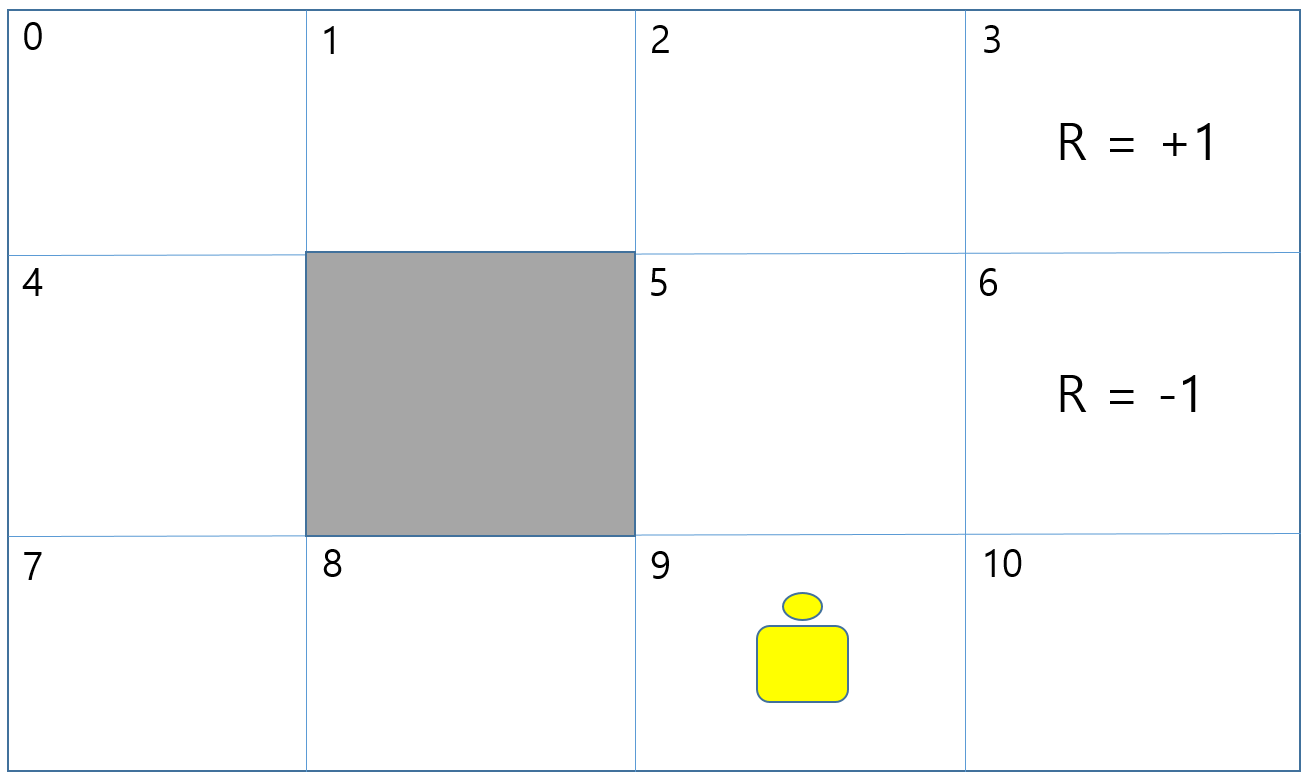

In [7]:
accMat = np.zeros([StateSize,StateSize])
for icnt1 in range(StateSize):
    for icnt2 in range(0, icnt1 + 1):
        accMat[icnt1,icnt2] = 1

def left(State):
    stateVec = np.zeros([StateSize,1])
    stateVec[State] = 1
    transitionVec = np.dot(action1.T,stateVec)   # left action
    accuVec = accMat.dot(transitionVec)
    thresholdVal = np.random.random()
    State = np.sum((accuVec - thresholdVal) < 0)
    print transitionVec.T
    print "left"
    return State
def right(State):
    stateVec = np.zeros([StateSize,1])
    stateVec[State] = 1
    transitionVec = np.dot(action2.T,stateVec)   # right action
    accuVec = accMat.dot(transitionVec)
    thresholdVal = np.random.random()
    State = np.sum((accuVec - thresholdVal) < 0)
    print transitionVec.T
    print "right"
    return State
def up(State):
    stateVec = np.zeros([StateSize,1])
    stateVec[State] = 1
    transitionVec = np.dot(action3.T,stateVec)   # up action
    accuVec = accMat.dot(transitionVec)
    thresholdVal = np.random.random()
    State = np.sum((accuVec - thresholdVal) < 0)
    print transitionVec.T
    print "up"
    return State
def down(State):
    stateVec = np.zeros([StateSize,1])
    stateVec[State] = 1
    transitionVec = np.dot(action4.T,stateVec)   # down action
    accuVec = accMat.dot(transitionVec)
    thresholdVal = np.random.random()
    State = np.sum((accuVec - thresholdVal) < 0)
    print transitionVec.T
    print "down"
    return State

PerformAction = {0: left,
          1: right,
          2: up,
          3: down}

print currentState
# action = 0 # left
# action = 1 # right
# action = 2 # up
# action = 3 # down
#################################################################
### Change the action and Try to obtain more reward!! ###########
action = 1
#################################################################
currentState = PerformAction[action](currentState)

if currentState == 3:
    curTotalReward = curTotalReward + 1
elif currentState == 6:
    curTotalReward = curTotalReward - 1
else:
    curTotalReward = curTotalReward*gammaVal
print "current Reward: %f" % curTotalReward

StateFigureName = "ReinforcementLearningMAZE_S%d.png" % currentState
Image(filename=StateFigureName, width=500) 


#### Take Reward, Q value function, and policy $\pi(a|s)$

In [8]:
Reward = np.zeros(StateSize)
Reward[3] = 1
Reward[6] = -1
#Reward = np.ones(StateSize)*1
#Reward[3] = 2
#Reward[6] = 0

# Q value initialization
QVal = np.zeros([StateSize, actionNum])

#### Policy update

The policy is the strategy of choosing actions among the action set $A = \{Left (=0), Right (=1), Up (=2), Down (=3)\}$.

$a = \arg\max_{a'\in A} Q(s,a')$



Probability of choosing action $a$:
\begin{eqnarray}
\pi(a|s) \leftarrow \delta\left(a - \arg\max_{a'\in A} Q(s,a')\right)
\end{eqnarray}

The variable PolicyPiMat in the following code is the $State \times Action$ matrix with elements of probabilities of choosing the action at each state.

In [9]:
def indices(a, func):
    return [i for (i, val) in enumerate(a) if func(val)]

# policy pi can be changed to probabilites later
policyPi = np.argmax(QVal, axis=1)

PolicyPiMat = np.zeros([StateSize,actionNum])
for iact in range(actionNum):
    curActionPolicy = np.zeros(StateSize)   # initialize
    StatesOfCurAction = indices(policyPi, lambda x: x == iact)  # states having current action as its maximum Q(s,a)
    curActionPolicy[StatesOfCurAction] = 1
    PolicyPiMat.T[iact] = curActionPolicy

#### Value function update

With the actions generated from the policy distribution $\pi(a|s)$ and the state transition probability distribution $p(s'|s,a)$, we consider the generated trajectory $h = \{(s_1,a_1), (s_2,a_2), \ldots\}$ with infinite length. Then the value function $Q(s,a)$ with given policy $\pi$ is the expectation of the total reward $r(s,a)$ on the trajectory discounted with $\gamma$.
\begin{eqnarray}
Q^\pi(s,a) &=& \mathbb{E}_{p^\pi(h)}\left[R(h)|s_1 = s, a_1 = a\right] \\
R(h) &=& r(s_1,a_1) + \gamma r(s_2,a_2) + \gamma^2 r(s_3,a_3) + \ldots \\
&=& \sum_{i = 1}^\infty r(s_i,a_i)\gamma^{i - 1}
\end{eqnarray}



The solution $Q$-function with policy $\pi$ satisfies the following Bellman equation for all state $s$ and action $a$:
\begin{eqnarray}
Q^\pi(s,a) &=& r(s,a) + \gamma\mathbb{E}_{\pi(a'|s')p(s'|s,a)}\left[Q^\pi(s',a')\right] \\
\pi(a|s) &=& \delta\left(a - \arg\max_{a'\in A} Q(s,a')\right)
\end{eqnarray}
with transition probabilities $p(s'|s,a)$ and the discount factor $\gamma$.



#### Q-Learning

Q-learning adopts the iterative process of putting the right-hand side to the left-hand side. At each $n=1,\ldots,N$, the $\widehat{Q}_n$ and $\pi_n$ is updated to $\widehat{Q}_{n + 1}$ and $\pi_{n + 1}$ using
\begin{eqnarray}
\widehat{Q}_{n+1}(s,a) &\leftarrow& r(s,a) + \gamma\mathbb{E}_{\pi(a'|s')p(s'|s,a)}\left[\widehat{Q}_n(s',a')\right] \\
\pi_{n+1}(a|s) &\leftarrow& \delta\left(a - \arg\max_{a'\in A} Q_n(s,a')\right)
\end{eqnarray}



#### Perform Q-Learning efficiently

By the following deriviation, the iterative update can be performed efficiently:
\begin{eqnarray}
\mathbb{E}_{\pi(a'|s')p(s'|s,a)}\left[\widehat{Q}_n(s',a')\right] &=& \sum_{a'}\sum_{s'}\pi(a'|s')p(s'|s,a)Q(s',a') \\
&=& \sum_{s'}p(s'|s,a)\underbrace{\sum_{a'}\pi(a'|s')Q(s',a')}_{\text{For each} \ s' \text{, calculate this scalar}. }.
\end{eqnarray}



Let $g(s') \equiv \sum_{a'}\pi(a'|s')Q(s',a')$ where the vector $\mathbf{g}$ with $s'$-element is $\mathbf{g}_{s'} = g(s')$:

\begin{eqnarray}
\left(\begin{array}{c} \ \\ \mathbf{g} \\ \ \end{array}\right) = 
\left[\left(\begin{array}{ccc} \ & \ & \ \\ \ & \mathbf{\pi}_{|S|\times|A|} & \ \\ \ & \ & \ \end{array}\right) \odot \left(\begin{array}{ccc} \ & \ & \ \\ \ & \mathbf{Q_{|S|\times|A|}} & \ \\ \ & \ & \ \end{array}\right)\right]\mathbf{1}_{|A|}
\end{eqnarray}
with $\odot$, the elementwise multiplication of two matrices.


With another definition of the matrix $F_{|S|\times|A|}$ with $(s,a)$-element $F_{s,a} = \mathbb{E}[Q(s,a)]$, we can obtain the elementwise equation:
\begin{eqnarray}
F_{s,a} = \sum_{s'} p(s'|s,a)g(s'),
\end{eqnarray}
and the following matrix equation:
\begin{eqnarray}
\left(\begin{array}{ccc} \ & \ & \ \\ \ & F_{|S|\times|A|} & \ \\ \ & \ & \ \end{array}\right) = \left(\left(\begin{array}{c} \ \\ \mathbf{f}^{a = 1} \\ \ \end{array}\right)\left(\begin{array}{c} \ \\ \mathbf{f}^{a = 2} \\ \ \end{array}\right)\ldots\left(\begin{array}{c} \ \\ \mathbf{f}^{a = A} \\ \ \end{array}\right)\right)
\end{eqnarray}

with vectors satisfying
\begin{eqnarray}
\left(\begin{array}{c} \ \\ \mathbf{f}^a \\ \ \end{array}\right) = \left(\begin{array}{ccc} \ & \ & \ \\ \ & T^a \\ \ & \ & \ \end{array}\right) \left(\begin{array}{c} \ \\ \mathbf{g} \\ \ \end{array}\right)
\end{eqnarray}

with transition matrix $T^a$ for each action $a$ having elements $T^a_{s,s'} = p(s'|s,a)$
\begin{eqnarray}
\left(\begin{array}{ccc} \ & \ & \ \\ \ & T^a_{s,s'} \\ \ & \ & \ \end{array}\right) = \left(\begin{array}{ccc} p(s'=1|s=1,a) & p(s'=2|s=1,a) & \cdots \\ p(s'=1|s=2,a) & \ddots \\ \vdots & \ & \ \end{array}\right).
\end{eqnarray}

The element of $\mathbf{f}^a$ is $\mathbf{f}^a_s$ and the element of $\mathbf{g}$ is $\mathbf{g}_{s'}$.


In [10]:
# g vector update
gvec = np.sum(np.multiply(PolicyPiMat,QVal), axis=1)    # elementwise multiplication 1 (Good)
#gvec = np.multiply(PolicyPiMat,QVal).dot(np.ones(actionNum)).T    # elementwise multiplication 2 (Good)

In [11]:
def left():
    return action1
def right():
    return action2
def up():
    return action3
def down():
    return action4

actionTransitionMat = {0: left,
          1: right,
          2: up,
          3: down}

EQVal = np.zeros([StateSize,actionNum])
for iact in range(actionNum):
#    print actionTransitionMat[iact]()
    EQVal[:,iact] = actionTransitionMat[iact]().dot(gvec)

#print EQVal

The variable EQVal is the matrix $F$.

In [12]:
# print np.matrix(Reward).T
# print np.tile(np.matrix(Reward).T, [1,4])

#QVal = np.tile(np.matrix(Reward).T, [1,4]) + gammaVal*EQVal
QVal = np.tile(Reward, [4,1]).T + gammaVal*EQVal
#print QVal
#print type(QVal)

Now one iteration is finished.

#### perform many times

In [13]:
epochNum = 100

def left():
    return action1
def right():
    return action2
def up():
    return action3
def down():
    return action4

for iepoch in range(epochNum):
    ####### Policy update #######
    policyPi = np.argmax(QVal, axis=1)

    PolicyPiMat = np.zeros([StateSize,actionNum])
    for iact in range(actionNum):
        curActionPolicy = np.zeros(StateSize)   # initialize
        StatesOfCurAction = indices(policyPi, lambda x: x == iact)  # states having current action as its maximum Q(s,a)
        curActionPolicy[StatesOfCurAction] = 1
        PolicyPiMat.T[iact] = curActionPolicy

    ######## Value function update #######
    gvec = np.sum(np.multiply(PolicyPiMat,QVal), axis=1)    # elementwise multiplication
    actionTransitionMat = {0: left,
                          1: right,
                          2: up,
                          3: down}
    EQVal = np.zeros([StateSize,actionNum])
    for iact in range(actionNum):
        EQVal[:,iact] = actionTransitionMat[iact]().dot(gvec)

    QVal = np.tile(Reward, [4,1]).T + gammaVal*EQVal

print QVal
print np.argmax(QVal,1)

[[ 1.53950281  1.70983944  1.53950281  1.38742036]
 [ 1.5517395   1.91262114  1.72207614  1.72207614]
 [ 1.73488227  2.13946044  1.9186221   1.69555635]
 [ 2.41210037  2.41210037  2.41210037  2.41210037]
 [ 1.37670645  1.37670645  1.5287889   1.24705375]
 [ 1.64100487  0.59867043  1.86407062  1.47061379]
 [ 0.57723798  0.57723798  0.57723798  0.57723798]
 [ 1.24478774  1.33342197  1.37444045  1.24478774]
 [ 1.2453699   1.47995739  1.33400413  1.33400413]
 [ 1.34257954  1.31825558  1.65371126  1.47700939]
 [ 1.44992781  1.28486322  0.55180376  1.28486322]]
[1 1 1 0 2 2 0 2 1 2 0]


#### Move agent using MDP policy

In [14]:
MDPAgentTotReward = 0
currentState = np.floor(np.random.random()*StateSize)
currentState = int(currentState)

[[ 0.1  0.1  0.1  0.   0.1  0.1  0.1  0.1  0.1  0.1  0.1]]
left
current Reward: 2.421107


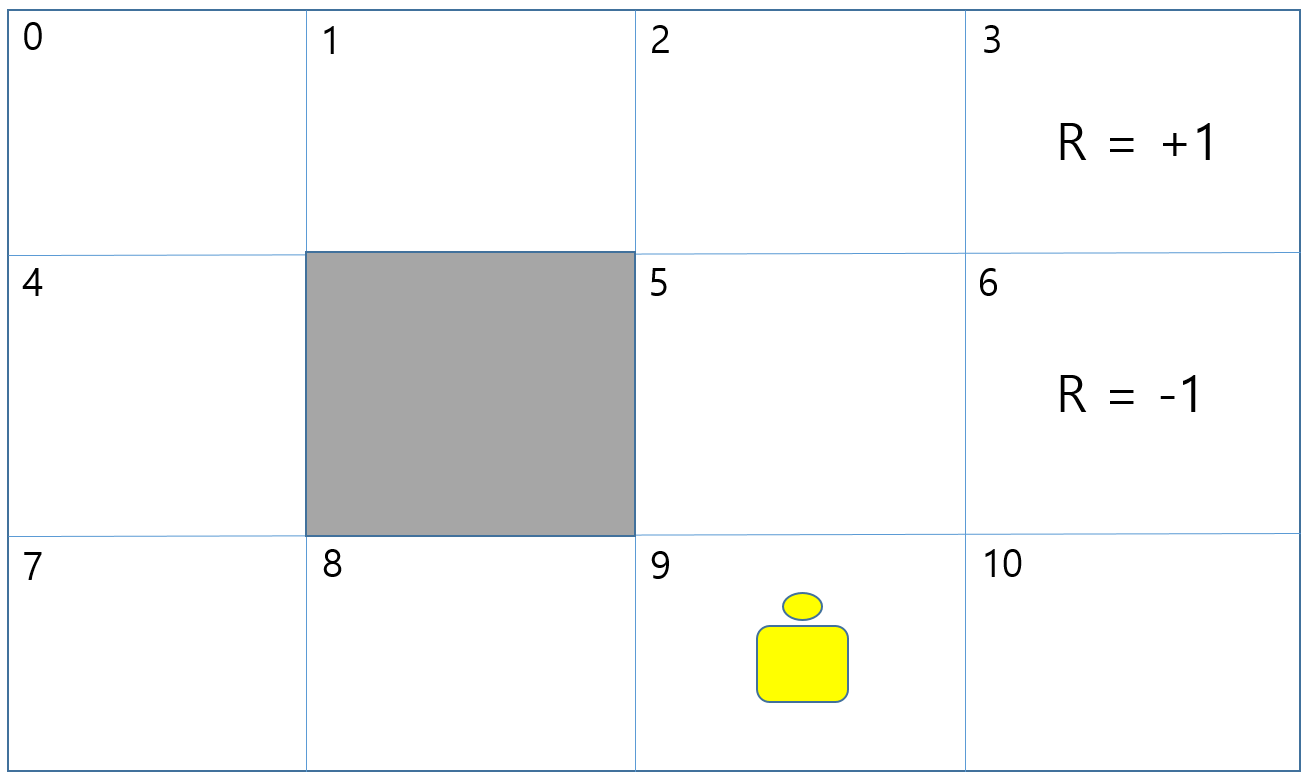

In [32]:
QValCurState = QVal[currentState]
chosenAction = np.argmax(QValCurState)


currentState = PerformAction[chosenAction](currentState)

if currentState == 3:
    MDPAgentTotReward = MDPAgentTotReward + 1
elif currentState == 6:
    MDPAgentTotReward = MDPAgentTotReward - 1
else:
    MDPAgentTotReward = MDPAgentTotReward*gammaVal
print "current Reward: %f" % MDPAgentTotReward

StateFigureName = "ReinforcementLearningMAZE_S%d.png" % currentState
Image(filename=StateFigureName, width=500)